In [3]:
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import pandas as pd

In [2]:
df_Conectividad_servicio_Internet = pd.read_pickle('./Internet_datasets/Conectividad_servicio_Internet.pickle')

In [3]:
keys = ['ADSL','CABLEMODEM','DIALUP','FIBRAOPTICA','SATELITAL','WIRELESS','TELEFONIAFIJA','3G','4G']

In [4]:
porcentaje_si = lambda x: (x == 'SI').sum() / x.count() * 100

In [5]:
df_porcentaje_SI = df_Conectividad_servicio_Internet.groupby('Provincia').agg({'ADSL': porcentaje_si,
                                                    'CABLEMODEM': porcentaje_si,
                                                    'DIALUP': porcentaje_si,
                                                    'FIBRAOPTICA': porcentaje_si,
                                                    'SATELITAL': porcentaje_si,
                                                    'WIRELESS': porcentaje_si,
                                                    'TELEFONIAFIJA': porcentaje_si,
                                                    '3G': porcentaje_si,
                                                    '4G': porcentaje_si})
df_porcentaje_SI = df_porcentaje_SI.reset_index()
df_porcentaje_SI

,Provincia,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G
0,BUENOS AIRES,39.400666,38.290788,23.640400,49.167592,17.425083,55.160932,60.821310,65.482797,72.697003
1,CABA,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,CATAMARCA,3.846154,1.648352,0.549451,12.637363,26.373626,18.131868,17.032967,15.934066,31.318681
3,CHACO,30.434783,15.217391,1.086957,48.913043,46.739130,50.000000,51.086957,47.826087,81.521739
4,CHUBUT,14.444444,12.222222,16.666667,14.444444,54.444444,34.444444,60.000000,34.444444,42.222222
5,CORDOBA,32.553957,16.007194,0.899281,30.935252,13.129496,52.517986,55.755396,49.820144,61.870504
6,CORRIENTES,26.923077,11.538462,1.282051,15.384615,70.512821,57.692308,65.384615,50.000000,89.743590
7,ENTRE RIOS,24.226804,20.103093,2.061856,22.680412,11.340206,67.010309,65.979381,40.206186,65.979381
8,FORMOSA,20.634921,4.761905,0.000000,25.396825,36.507937,93.650794,47.619048,25.396825,66.666667
9,JUJUY,12.500000,9.375000,0.000000,27.500000,27.500000,24.375000,22.500000,17.500000,28.125000


In [38]:
# Se elimina la columna 'DIALUP' ya que es una tecnologia obsoleta
df_porcentaje_SI.drop(['DIALUP',],axis=1,inplace=True)
df_porcentaje_SI

,Provincia,ADSL,CABLEMODEM,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G
0,BUENOS AIRES,39.400666,38.290788,49.167592,17.425083,55.160932,60.821310,65.482797,72.697003
1,CABA,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,CATAMARCA,3.846154,1.648352,12.637363,26.373626,18.131868,17.032967,15.934066,31.318681
3,CHACO,30.434783,15.217391,48.913043,46.739130,50.000000,51.086957,47.826087,81.521739
4,CHUBUT,14.444444,12.222222,14.444444,54.444444,34.444444,60.000000,34.444444,42.222222
5,CORDOBA,32.553957,16.007194,30.935252,13.129496,52.517986,55.755396,49.820144,61.870504
6,CORRIENTES,26.923077,11.538462,15.384615,70.512821,57.692308,65.384615,50.000000,89.743590
7,ENTRE RIOS,24.226804,20.103093,22.680412,11.340206,67.010309,65.979381,40.206186,65.979381
8,FORMOSA,20.634921,4.761905,25.396825,36.507937,93.650794,47.619048,25.396825,66.666667
9,JUJUY,12.500000,9.375000,27.500000,27.500000,24.375000,22.500000,17.500000,28.125000


C:\Users\guill\AppData\Local\Temp\ipykernel_21016\1551527231.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax =  sns.barplot(x='Provincia', y='Porcentaje', hue='Tipo de Conexión', data=df_melted, ci=None)


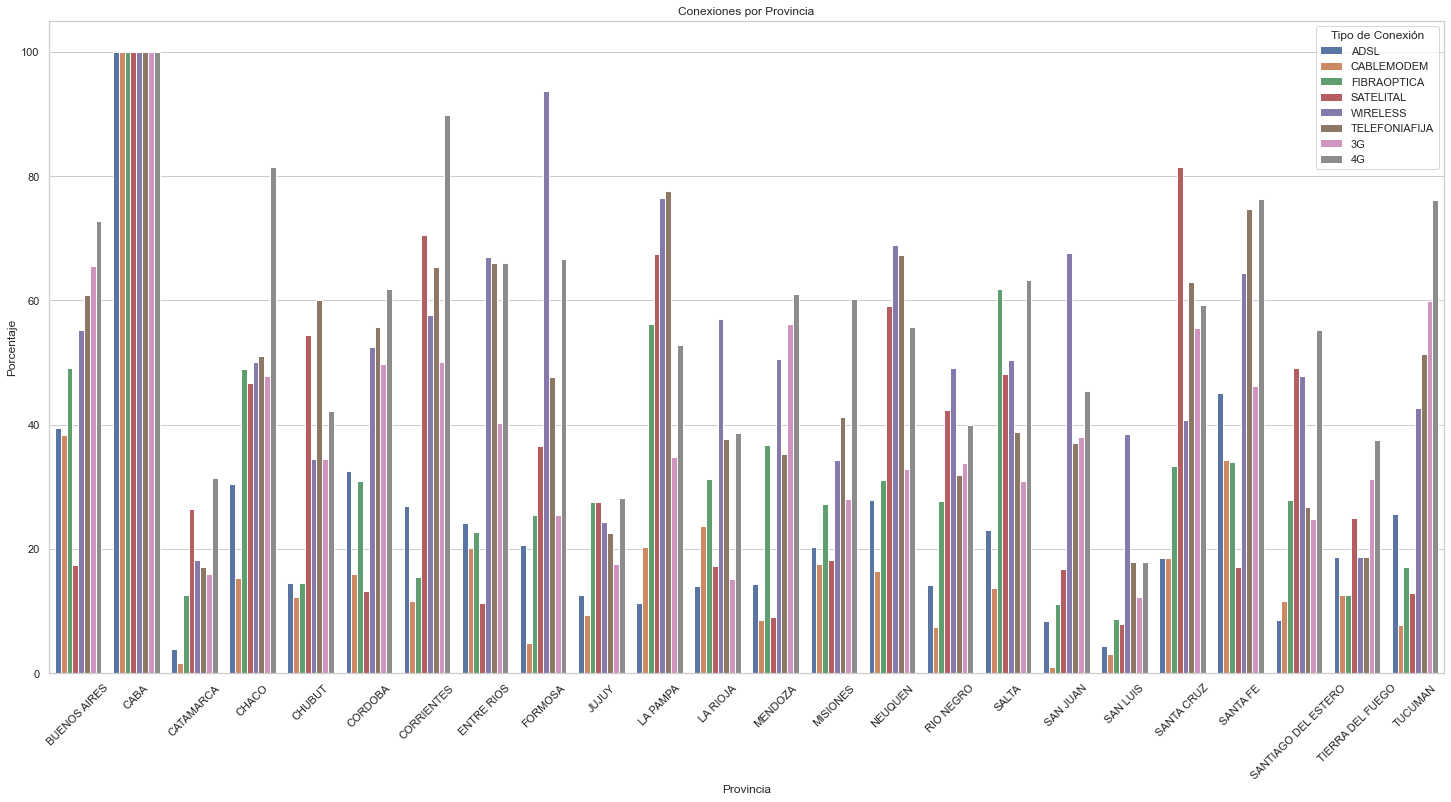

In [39]:
# Derrite el DataFrame para obtener una columna "Tipo de Conexión" y una columna "Porcentaje"
df_melted = df_porcentaje_SI.melt(id_vars='Provincia', var_name='Tipo de Conexión', value_name='Porcentaje')

# Configura el estilo de Seaborn
sns.set(style='whitegrid')

# Aumenta el tamaño del gráfico
plt.figure(figsize=(25, 12))  # Puedes ajustar el tamaño según tus necesidades

# Crea el gráfico de barras
ax =  sns.barplot(x='Provincia', y='Porcentaje', hue='Tipo de Conexión', data=df_melted, ci=None)

# Ajusta los ejes y el título
plt.xlabel('Provincia')
plt.ylabel('Porcentaje')
plt.title('Conexiones por Provincia')

# Rotar etiquetas del eje x a 45 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Muestra el gráfico
plt.show()

Este grafico muestra el porcentaje de disponibilidad de las distintas tecnologias de accesos a internet teniendo en cuenta la totalidad de los barrios de cada provinvia. Se pude observar que en CABA posee todas las tecnologias por lo que se deduce que en esa provincia la competencia es alta. Pero en otras provincias como Catamarca 

In [8]:
df_Penetración_servicio_Internet_fijo = pd.read_pickle('./Internet_datasets/Penetración_servicio_Internet_fijo.pickle')

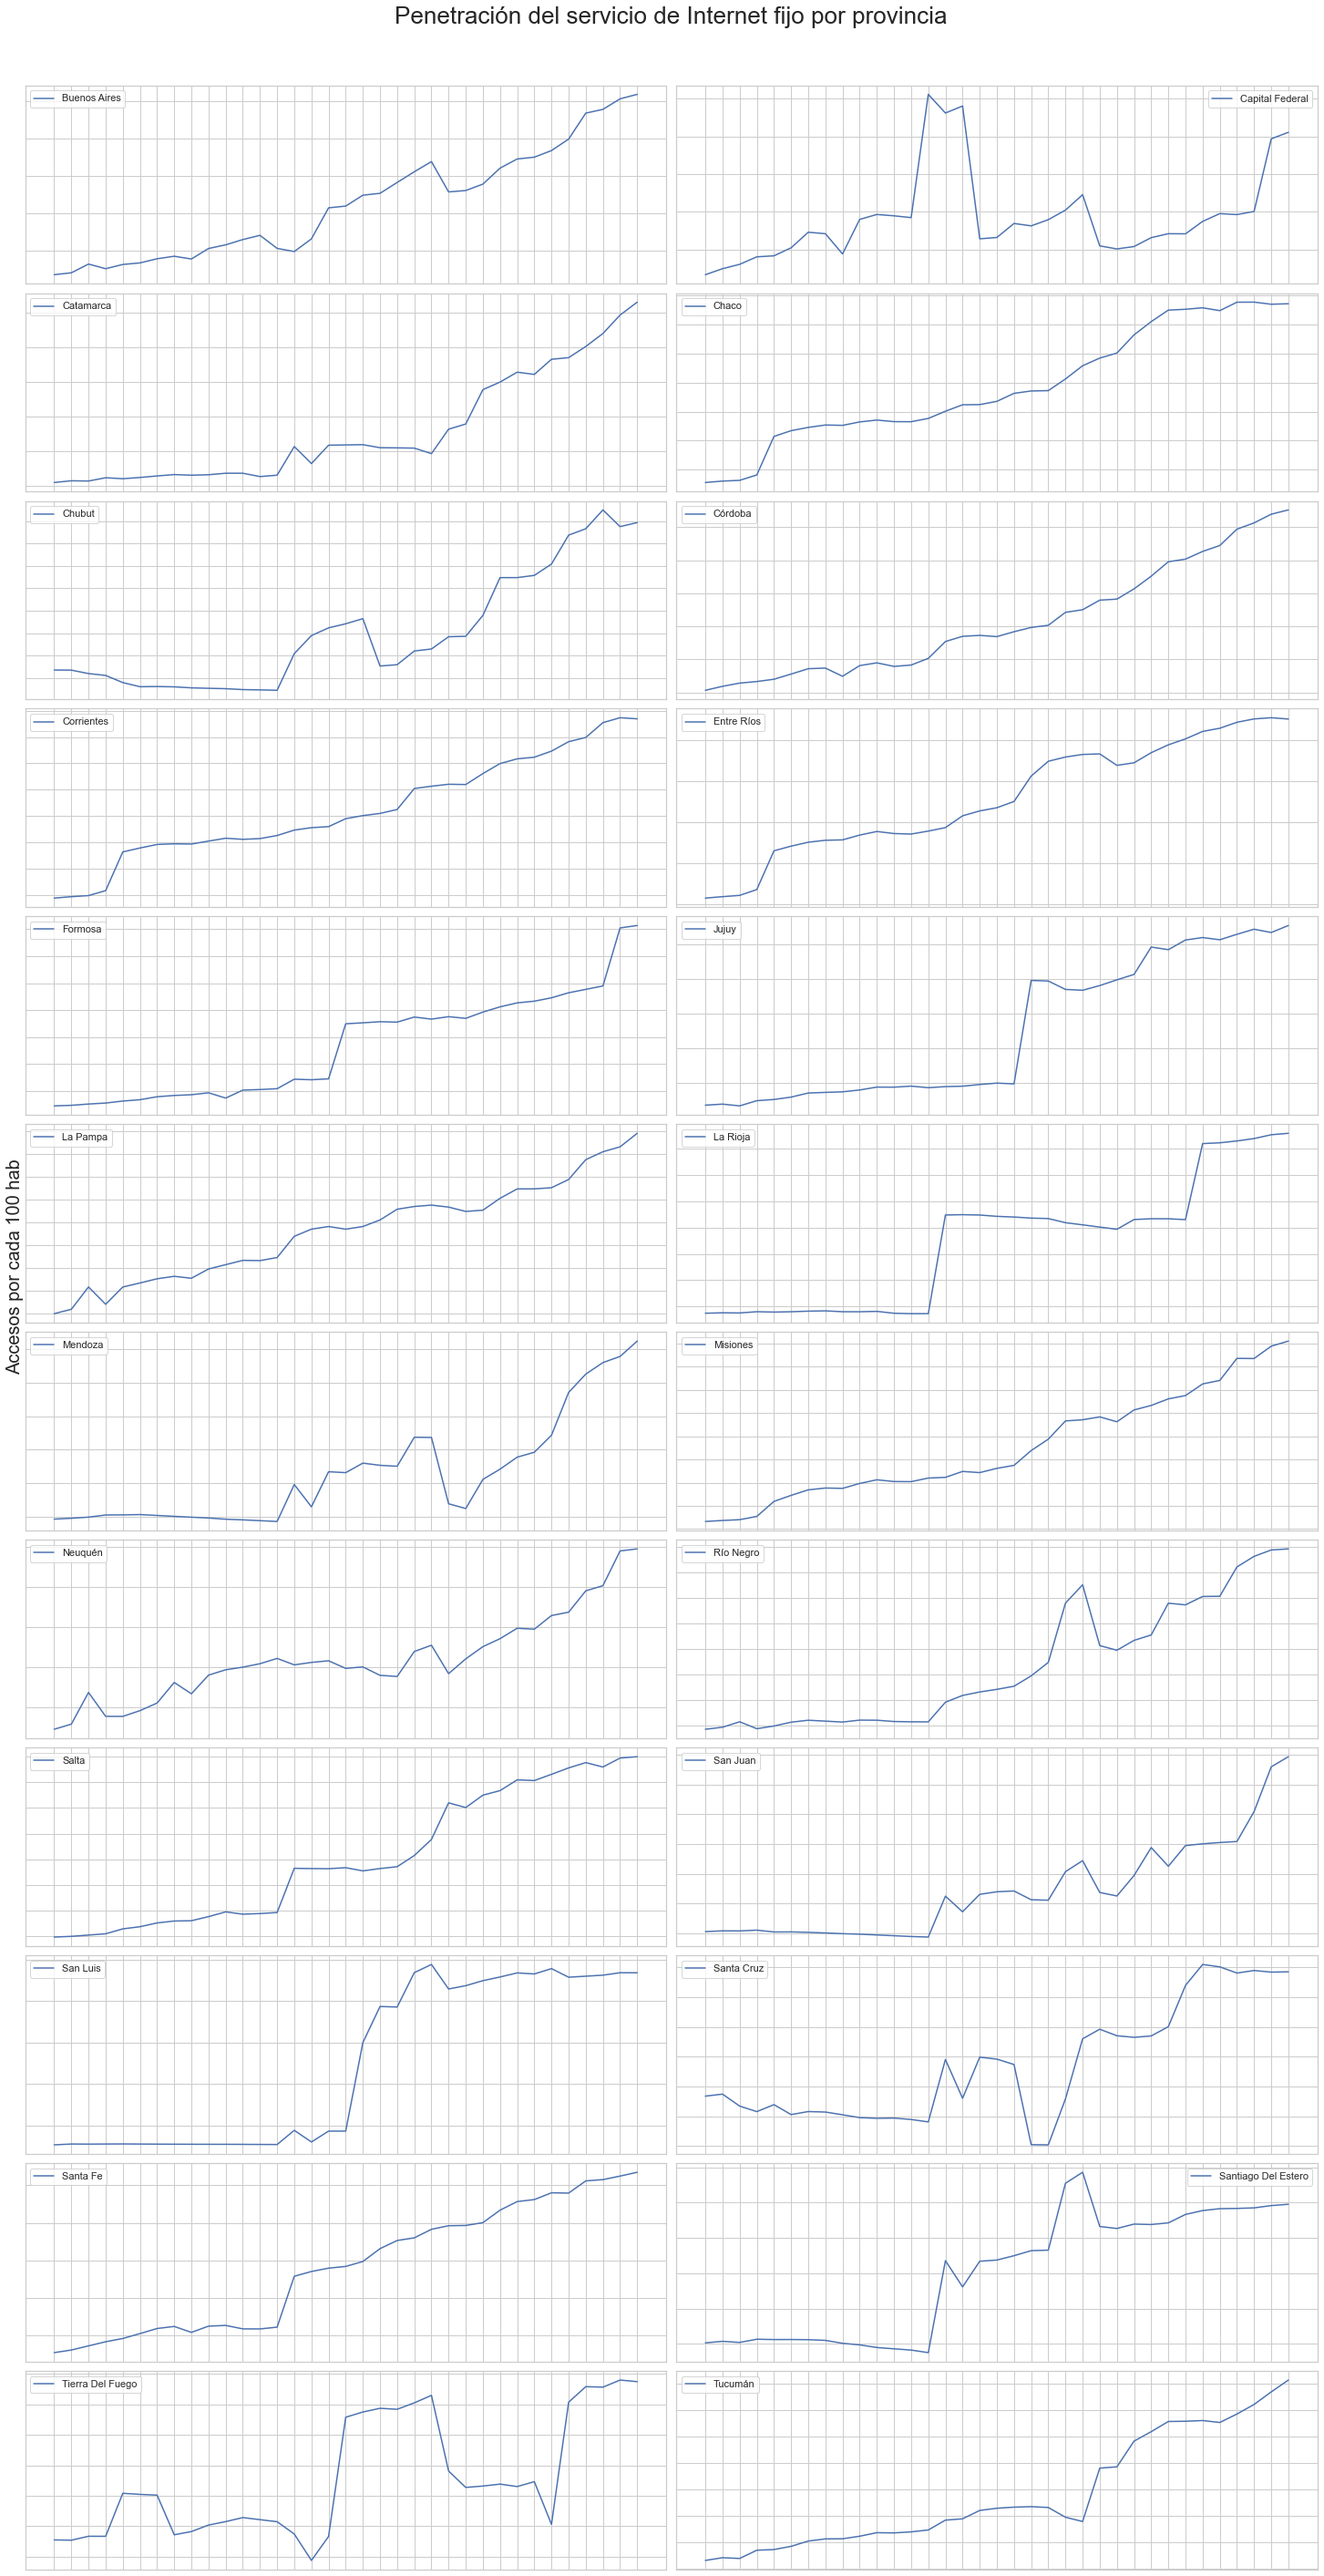

In [35]:
# Obtener la lista de provincias únicas
provincias = df_Penetración_servicio_Internet_fijo['Provincia'].unique()

# Calcular el número de filas y columnas para la cuadrícula
num_filas = (len(provincias) + 1) // 2  # Número de filas en la cuadrícula, redondeado hacia arriba
num_columnas = 2

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 40))

# Recorrer cada provincia y crear un gráfico en el subplot correspondiente
for i, provincia in enumerate(provincias):
    fila = i // num_columnas  # Fila actual en la cuadrícula
    columna = i % num_columnas  # Columna actual en la cuadrícula
    
    ax = axs[fila, columna] if num_filas > 1 else axs[columna]  # Seleccionar el subplot correspondiente
    
    temp = df_Penetración_servicio_Internet_fijo[df_Penetración_servicio_Internet_fijo['Provincia'] == provincia].sort_values('Año-Trimestre')
    ax.plot(temp['Año-Trimestre'], temp['Accesos por cada 100 hab'], label=provincia)

    ax.legend()
    
    # Eliminar etiquetas del eje y
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
# Ajustar los espacios entre los subplots
plt.tight_layout()

# Ajustar los márgenes para dejar espacio al título general
plt.subplots_adjust(top=0.95)

# Título general
fig.suptitle('Penetración del servicio de Internet fijo por provincia', fontsize=26)

# Título del eje Y general
fig.text(0, 0.5, 'Accesos por cada 100 hab', va='center', rotation='vertical', fontsize=20, ha='center')

# Mostrar el gráfico
plt.show()

Analizando las tendencias de acceso cada 100 habitantes se puede sacar como conclucion que la mayoria de las provincias tienen una tendencia alcista constantes o con pequeños rebotes que se pueden considerar como buenos signos para una empresa que se dedique a proveer acceso a internet y otras las cuales presentan volatilidad por lo que se presume que los accesos a internet fijo son temporales o por temporadas. En otros casos como San Luiz se produjo un boom en los accesos y luego se estabilizo.

In [4]:
df_Accesos_Internet_fijo_tecnología_localidad = pd.read_pickle('./Internet_datasets/Accesos_Internet_fijo_tecnología_localidad.pickle')

In [6]:
print('Número de accesos al servicio de Internet fijo por tecnología  en cada localidad declarada Categoría')
df_Accesos_Internet_fijo_tecnología_localidad

Número de accesos al servicio de Internet fijo por tecnología  en cada localidad declarada Categoría


,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,873,4704,0,2,0,975,0,664,7218
1,BUENOS AIRES,25 de Mayo,Del Valle,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3137,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,0,1,0,471,0,0,0,0,472
3138,TUCUMAN,Trancas,San Pedro de Colalao,0,0,0,0,0,0,0,313,313
3139,TUCUMAN,Trancas,Villa de Trancas,150,0,0,0,33,0,0,99,282
3140,TUCUMAN,Yerba Buena,Villa Carmela,1725,0,0,0,1,0,0,97,1823
